In [36]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

import itertools

import string
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data collection (Kaz Rus wikipedia dataset)

In [37]:
kazakhData = pd.read_csv('kazdata.txt', sep='\t', header=None, names=['Kazakh'])
russianData = pd.read_csv('rusdata.txt', sep='\t', header=None, names=['Russian'])

In [38]:
kazakhData.head()

,Kazakh
1,«10.01.10-журналистика» мамандығы бойынша мерз...
2,№ 1001 әскери бөлім және Ызғант ауылындағы мәд...
3,"«10.02.20 – Салыстырмалы-тарихи, типологиялық ..."
4,№1004 авторлық куәлікке ие (2003).
5,"• 105 жыл бұрын (1906-1972) драматург, киносце..."


In [39]:
# Remove all punctuation and special characters
for char in string.punctuation:
    print(char, end='')
translate_table = dict((ord(char), None) for char in string.punctuation)
translate_table[ord('«')] = None
translate_table[ord('»')] = None
translate_table[ord('–')] = None
translate_table[ord('•')] = None
translate_table[ord('№')] = None
translate_table[ord('—')] = None
translate_table[ord('“')] = None
translate_table[ord('²')] = None
translate_table[ord('í')] = None
translate_table[ord('ö')] = None
translate_table[ord('ı')] = None
translate_table[ord('−')] = None
translate_table[ord('…')] = None


# Data preprocessing (data parsed from Wikipedia => a lot of noise)
kazDataPrep = []
kazLang = []
for i, line in kazakhData.iterrows():
    line = line['Kazakh']
    if len(line)!=0:
        line = line.lower()
        line = re.sub(r'\d+','',line)
        line = re.sub(r'[a-zA-Z]+','',line) #removing all english characters
        line = line.translate(translate_table) 
        line = re.sub(r'^\\u$[a-zA-Z]','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\ufeff','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\u200b','', line) #removing special characters from wikipedia articles
        line = re.sub(r'[\u4e00-\u9fff]+','', line) #removing special characters from wikipedia articles
        line = "".join(c for c in line if c.isalpha() or c == " ")
        kazDataPrep.append(line)
        kazLang.append('Kazakh')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

In [40]:
translate_table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None,
 171: None,
 187: None,
 8211: None,
 8226: None,
 8470: None,
 8212: None,
 8220: None,
 178: None,
 237: None,
 246: None,
 305: None,
 8722: None,
 8230: None}

In [41]:
rusDataPrep = []
rusLang = []
for i, line in russianData.iterrows():
    line = line['Russian']
    if len(line)!=0:
        line = line.lower()
        line = re.sub(r'\d+','',line)
        line = re.sub(r'[a-zA-Z]+','',line) #removing all english characters
        line = line.translate(translate_table) 
        line = re.sub(r'^\\u$[a-zA-Z]','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\ufeff','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\u200b','', line) #removing special characters from wikipedia articles
        line = re.sub(r'[\u4e00-\u9fff]+','', line) #removing special characters from wikipedia articles
        line = re.sub('\n\t', '', line)
        line = "".join(c for c in line if c.isalpha() or c == " ")
        
        rusDataPrep.append(line)
        rusLang.append('Russian')
        
#data is still need some cleaning

In [42]:
kazData2 = pd.read_csv('result.txt', sep='utf-8', names=['text']) #ISSAI Kazakh Corpus dataset, no need to clean
kazData2Lang = []
for i in range(kazData2.shape[0]):
    kazData2Lang.append('Kazakh')

C:\Users\Temirlan\AppData\Local\Temp\ipykernel_7620\2936372924.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  kazData2 = pd.read_csv('result.txt', sep='utf-8', names=['text']) #ISSAI Kazakh Corpus dataset, no need to clean


In [43]:
ruData2 = pd.read_csv('jokesData.csv',sep='utf-8',names=['text'])
ruData2
ruDataPrep2 = []
ruLang2 = []
for i, line in ruData2.iterrows():
    line = line['text']
    if len(line)!=0:
        line = line.lower()
        line = re.sub(r'\d+','',line)
        line = re.sub(r'[a-zA-Z]+','',line) #removing all english characters
        line = line.translate(translate_table) 
        line = re.sub(r'^\\u$[a-zA-Z]','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\ufeff','', line) #removing special characters from wikipedia articles
        line = re.sub(r'\u200b','', line) #removing special characters from wikipedia articles
        line = re.sub(r'[\u4e00-\u9fff]+','', line) #removing special characters from wikipedia articles
        line = "".join(c for c in line if c.isalpha() or c == " ")
        ruDataPrep2.append(line)
        ruLang2.append('Russian')

C:\Users\Temirlan\AppData\Local\Temp\ipykernel_7620\1310996652.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ruData2 = pd.read_csv('jokesData.csv',sep='utf-8',names=['text'])


In [44]:
# ruDataPrep2: ruLang2, kazData2: kazData2Lang, rusDataPrep: rusLang, kazDataPrep: kazLang

In [45]:
data = pd.DataFrame({
    'Text': rusDataPrep + ruDataPrep2 + kazDataPrep + list(kazData2['text']),
    'Language': rusLang + ruLang2 + kazLang + kazData2Lang
})

(443970, 533205)

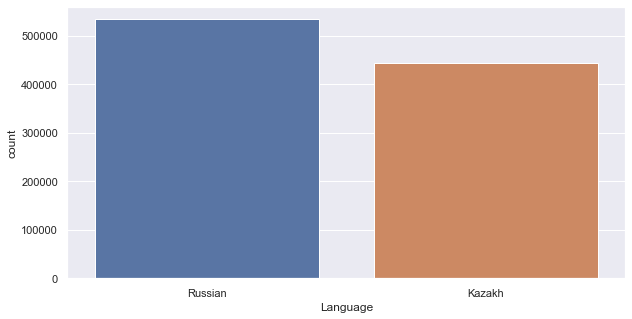

In [46]:
#dataset is somewhat balanced
plt.figure(figsize=(10,5))
sns.countplot(x = data['Language'], data=data)
data[data['Language']=='Kazakh'].shape[0], data[data['Language']=='Russian'].shape[0]

In [47]:
data.head()

,Text,Language
0,и стал на несколько лет основной домашней ар...,Russian
1,срок обучения года форма обучения очная,Russian
2,лет российскому футболу подвижный техничный т...,Russian
3,арарат оступился в раунде следующем где лонд...,Russian
4,ведущий программ малич фм программы вечер по...,Russian


In [48]:
data.tail()

,Text,Language
977170,мәселен сіңбелік су жер қыртысыныңі жоғарғы қа...,Kazakh
977171,театрландырылған қойылымдарымыз жәрмеңкелерімі...,Kazakh
977172,ханның қабылдауларына қатысып отырған деп те а...,Kazakh
977173,жеке қаламгерлер арқылы болса да өзге ел әдеби...,Kazakh
977174,ғайып құран мен тәпсірге сәйкес діни тағзым ет...,Kazakh


In [49]:
x = data['Text']
y = data['Language']
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.2, random_state=42, stratify=y)


In [50]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
xTransformed = vectorizer.fit_transform(x)

In [51]:
#xTrain, xTest, yTrain, yTest = train_test_split(xTransformed, y, test_size=.2, random_state=42)

In [52]:
pipeMNB = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])
pipeMNB.fit(xTrain, yTrain,)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [18]:
#pipeLogReg = pipeline.Pipeline([
#    ('vectorizer', vectorizer),
#    ('clf', LogisticRegression())
#])
#pipeLogReg.fit(xTrain, yTrain)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [54]:
MNBPreds = pipeMNB.predict(xTest)
#LogRegPreds = pipeLogReg.predict(xTest)
print('MNB results \n' +  metrics.classification_report(MNBPreds, yTest))
#print('LogReg results \n' +  metrics.classification_report(LogRegPreds, yTest))

MNB results 
              precision    recall  f1-score   support

      Kazakh       1.00      1.00      1.00     88899
     Russian       1.00      1.00      1.00    106536

    accuracy                           1.00    195435
   macro avg       1.00      1.00      1.00    195435
weighted avg       1.00      1.00      1.00    195435



In [20]:
def inference(s, model):
    s = pd.Series(s)
    return model.predict(s)[0]

In [21]:
inference('салем', pipeMNB),inference('здравствуйте у меня не работает ', pipeMNB)

('Kazakh', 'Russian')

In [33]:
MNBPreds

array(['Russian', 'Russian', 'Russian', ..., 'Kazakh', 'Kazakh',
       'Russian'], dtype='<U7')

In [35]:
from sklearn.metrics import roc_auc_score, f1_score
f1_score((MNBPreds=='Russian'), (yTest == 'Russian'))

0.9988601021686204

## Checking

In [109]:
joblib.dump(pipeMNB, 'model.pkl') 

['model.pkl']